# Accident Severity Probability Prediction in Seattle City
## IBM Coursera Applied Data Science Capstone Project
### Malik Haddad
### 04 September 2022

## 1. Problem Introduction
Data to represent road condition that lead to accident is needed for accident severity analysis and prediction. These data could be the the road condition during the accident, the weather, the light condition, the driver condition, etc. From these data, a model could be built to predict the severity of accident if it occurs during that particular road, and driver conditions.

In [1]:
import pandas as pd
import numpy as np

## 2. Data Acquisition, Selection, and Cleaning
2.1. Data Acquisition
Dataset acquired from https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv. The metadata for this dataset can be downloaded in https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf.



In [3]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

C:\Users\malik\AppData\Local\Temp\ipykernel_22940\1874885138.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data-Collisions.csv")


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
time = df.sort_values(by='INCDATE')
print("Data start date:", time['INCDATE'].head(1).item())
print("Data end date", time['INCDATE'].tail(1).item())

Data start date: 2004/01/01 00:00:00+00
Data end date 2020/05/20 00:00:00+00


In [5]:
df = df.dropna(subset=["X"], axis=0)
df = df.dropna(subset=["Y"], axis=0)
df = df.rename(columns={'X':'LONGITUDE', 'Y':'LATITUDE'})
print(df.shape)
df.head()

(189339, 38)


,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### 2.2. Features Selection
Checking all the features in the dataset, then selecting relevant features for modelling.

In [6]:
print(df['JUNCTIONTYPE'].value_counts())
print(df['JUNCTIONTYPE'].value_counts().sum())
print(df['ADDRTYPE'].value_counts())
print(df['ADDRTYPE'].value_counts().sum())

Mid-Block (not related to intersection)              87390
At Intersection (intersection related)               62491
Mid-Block (but intersection related)                 22465
Driveway Junction                                    10580
At Intersection (but not related to intersection)     2071
Ramp Junction                                          143
Unknown                                                  6
Name: JUNCTIONTYPE, dtype: int64
185146
Block           124591
Intersection     64748
Name: ADDRTYPE, dtype: int64
189339


In [8]:
df.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'OBJECTID', 'INCKEY',
       'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [9]:
model_df = df[['LATITUDE', 'LONGITUDE', 'ADDRTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL',\
               'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'SEVERITYCODE']]
model_df.head()

,LATITUDE,LONGITUDE,ADDRTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,47.703140,-122.323148,Intersection,2,2,NaN,N,Overcast,Wet,Daylight,NaN,2
1,47.647172,-122.347294,Block,2,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,1
2,47.607871,-122.334540,Block,4,3,NaN,0,Overcast,Dry,Daylight,NaN,1
3,47.604803,-122.334803,Block,3,3,NaN,N,Clear,Dry,Daylight,NaN,1
4,47.545739,-122.306426,Intersection,2,2,NaN,0,Raining,Wet,Daylight,NaN,2


### 2.3. Data Cleaning
Checking missing data in each feature.
False: Data is available.
True: Data is missing.

In [11]:
missing_values = model_df.isnull()
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")

LATITUDE
False    189339
Name: LATITUDE, dtype: int64

LONGITUDE
False    189339
Name: LONGITUDE, dtype: int64

ADDRTYPE
False    189339
Name: ADDRTYPE, dtype: int64

PERSONCOUNT
False    189339
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    189339
Name: VEHCOUNT, dtype: int64

INATTENTIONIND
True     160163
False     29176
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    184602
True       4737
Name: UNDERINFL, dtype: int64

WEATHER
False    184414
True       4925
Name: WEATHER, dtype: int64

ROADCOND
False    184481
True       4858
Name: ROADCOND, dtype: int64

LIGHTCOND
False    184327
True       5012
Name: LIGHTCOND, dtype: int64

SPEEDING
True     180619
False      8720
Name: SPEEDING, dtype: int64

SEVERITYCODE
False    189339
Name: SEVERITYCODE, dtype: int64



In [12]:
clean_df = model_df.copy()

clean_df.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
clean_df.reset_index(drop=True, inplace=True)
clean_df.replace({'INATTENTIONIND' : {'Y' : int(1), np.nan : int(0)},
                 'SPEEDING' : {'Y' : int(1), np.nan : int(0)},
                 'UNDERINFL' : {'Y' : int(1), '1' : int(1),
                                'N' : int(0), '0' : int(0),
                                np.nan : int(0)}}, inplace=True)
clean_df['WEATHER'].replace(np.nan, 'Unknown', inplace=True)
clean_df['ROADCOND'].replace(np.nan, 'Unknown', inplace=True)
clean_df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace=True)

clean_df.shape

(189339, 12)

## 3. Exploratory Data Analysis
Explore the combination of road conditions that lead to accident. First, select the relevant data, and then check the unique data from each selected features. There are Unknown and Other values in the data that cannot be interpreted. Therefore, data with value Unknown or Other will be dropped from the dataframe.

In [13]:
EDA_df = clean_df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE']]
# drop Unknown and Other data in WEATHER feature
EDA_df = EDA_df[EDA_df.WEATHER != 'Unknown']
EDA_df = EDA_df[EDA_df.WEATHER != 'Other']
print(EDA_df['WEATHER'].value_counts(), "\n")
# drop Unknown and Other data in ROADCOND feature
EDA_df = EDA_df[EDA_df.ROADCOND != 'Unknown']
EDA_df = EDA_df[EDA_df.ROADCOND != 'Other']
print(EDA_df['ROADCOND'].value_counts(), "\n")
# drop Unknown and Other data in LIGHTCOND feature
EDA_df = EDA_df[EDA_df.LIGHTCOND != 'Unknown']
EDA_df = EDA_df[EDA_df.LIGHTCOND != 'Other']
print(EDA_df['LIGHTCOND'].value_counts(), "\n")
print(EDA_df.shape)

Clear                       108959
Raining                      32015
Overcast                     27136
Snowing                        894
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64 

Dry               121017
Wet                45569
Ice                 1086
Snow/Slush           889
Standing Water        95
Sand/Mud/Dirt         56
Oil                   49
Name: ROADCOND, dtype: int64 

Daylight                    110315
Dark - Street Lights On      45621
Dusk                          5532
Dawn                          2337
Dark - No Street Lights       1333
Dark - Street Lights Off      1071
Dark - Unknown Lighting          8
Name: LIGHTCOND, dtype: int64 

(166217, 4)


### 3.1. Accidents that Lead to Property Damage
Use group by and value count method to calculate the number of accident in each combination of conditions. Top ten conditions that lead to accident with property damage is selected by using sort_values and head method. Finally, joining the WEATHER, ROADCOND, and LIGHTCOND features into one feature called CONDITIONS.

In [14]:
EDA_df = EDA_df.groupby(['WEATHER', 'ROADCOND', 'LIGHTCOND'])['SEVERITYCODE'].value_counts().to_frame()
EDA_df = EDA_df.rename(columns={'SEVERITYCODE':'ACC_COUNTS'})
EDA_df = EDA_df.reset_index()

In [15]:
EDA_df1 = EDA_df[EDA_df.SEVERITYCODE == 1]
EDA_df1 = EDA_df1.sort_values(by=['ACC_COUNTS'], ascending=False)
EDA_df1 = EDA_df1.head(10).reset_index(drop=True)
EDA_df1['CONDITIONS'] = EDA_df1[['WEATHER','ROADCOND','LIGHTCOND']].agg(', '.join, axis=1)
cond = EDA_df1['CONDITIONS']
EDA_df1.drop(labels=['CONDITIONS', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE'], axis=1, inplace=True)
EDA_df1.insert(0, 'CONDITIONS', cond)
EDA_df1

,CONDITIONS,ACC_COUNTS
0,"Clear, Dry, Daylight",48828
1,"Clear, Dry, Dark - Street Lights On",16441
2,"Raining, Wet, Daylight",10400
3,"Raining, Wet, Dark - Street Lights On",8182
4,"Overcast, Dry, Daylight",7283
5,"Overcast, Wet, Daylight",3906
6,"Overcast, Dry, Dark - Street Lights On",2513
7,"Overcast, Wet, Dark - Street Lights On",2475
8,"Clear, Dry, Dusk",2051
9,"Clear, Wet, Daylight",1299


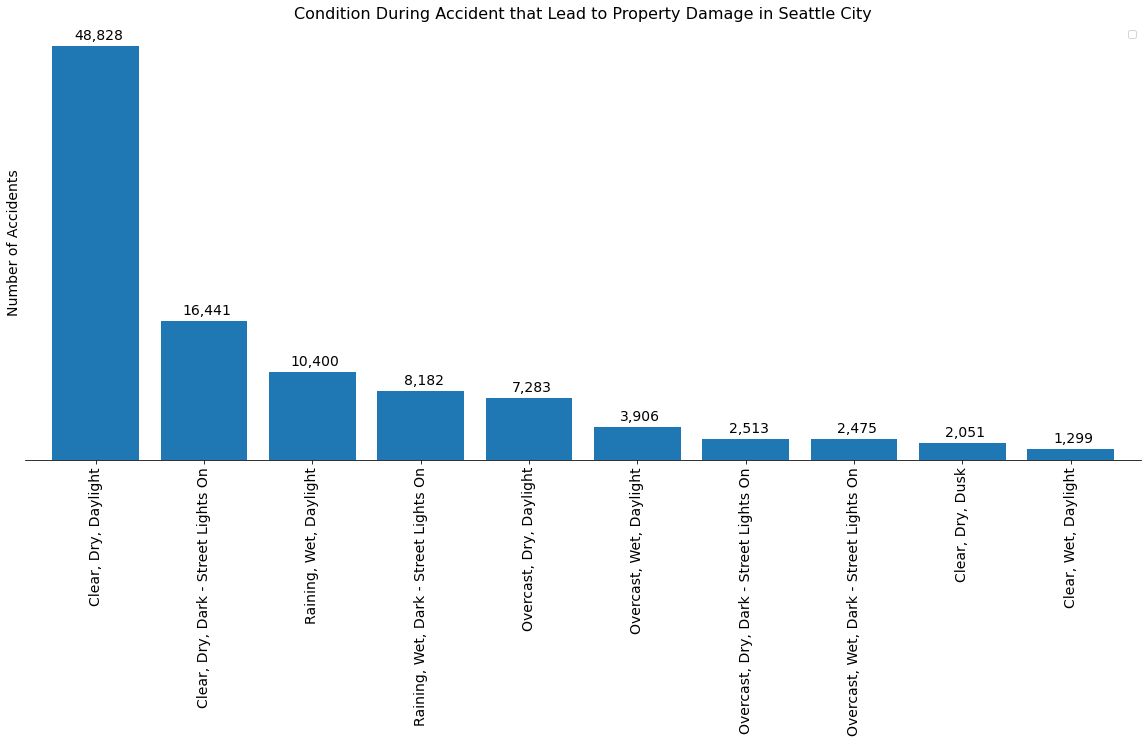

In [16]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

labels = EDA_df1['CONDITIONS'].to_list()

ax = EDA_df1.plot(kind='bar', stacked=False, width=0.8, figsize=(20,8), fontsize=14)

ax.set_title("Condition During Accident that Lead to Property Damage in Seattle City", size=16)
ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(labels)

for p in ax.patches:
    height = p.get_height()
    ax.annotate("{:,}".format(height), xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(3, 3), textcoords="offset points", 
                ha='center', va='bottom', fontsize=14)

ax.legend([])
ax.set_ylabel("Number of Accidents", size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

plt.show()

### 3.2. Accident that Lead to Injury
Use group by and value count method to calculate the number of accident in each combination of conditions. Top ten conditions that lead to accident with people injured is selected by using sort_values and head method. Finally, joining the WEATHER, ROADCOND, and LIGHTCOND features into one feature called CONDITIONS.

In [17]:
EDA_df2 = EDA_df[EDA_df.SEVERITYCODE == 2]
EDA_df2 = EDA_df2.sort_values(by=['ACC_COUNTS'], ascending=False)
EDA_df2 = EDA_df2.head(10).reset_index(drop=True)
EDA_df2['CONDITIONS'] = EDA_df2[['WEATHER','ROADCOND','LIGHTCOND']].agg(', '.join, axis=1)
cond = EDA_df2['CONDITIONS']
EDA_df2.drop(labels=['CONDITIONS', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE'], axis=1, inplace=True)
EDA_df2.insert(0, 'CONDITIONS', cond)
EDA_df2

,CONDITIONS,ACC_COUNTS
0,"Clear, Dry, Daylight",25127
1,"Clear, Dry, Dark - Street Lights On",6961
2,"Raining, Wet, Daylight",5564
3,"Raining, Wet, Dark - Street Lights On",4134
4,"Overcast, Dry, Daylight",3612
5,"Overcast, Wet, Daylight",1995
6,"Overcast, Dry, Dark - Street Lights On",1080
7,"Overcast, Wet, Dark - Street Lights On",1068
8,"Clear, Dry, Dusk",1009
9,"Clear, Wet, Daylight",712


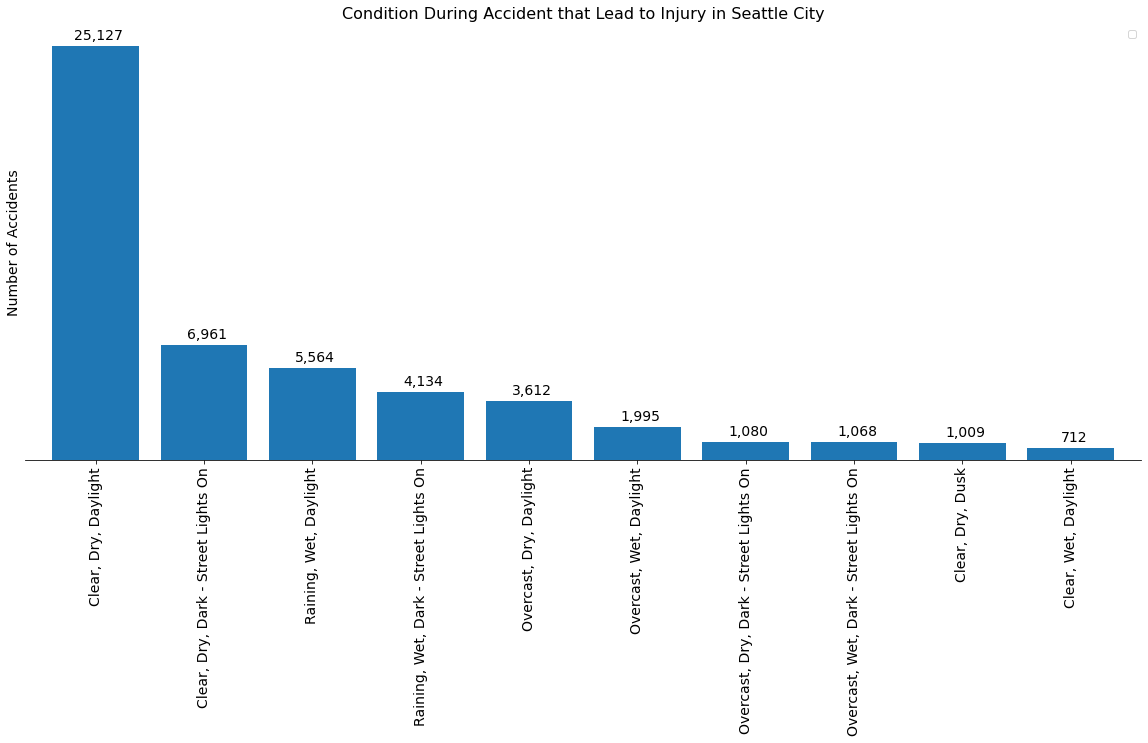

In [18]:
labels = EDA_df2['CONDITIONS'].to_list()

ax = EDA_df2.plot(kind='bar', stacked=False, width=0.8, figsize=(20,8), fontsize=14)

ax.set_title("Condition During Accident that Lead to Injury in Seattle City", size=16)
ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(labels)

for p in ax.patches:
    height = p.get_height()
    ax.annotate("{:,}".format(height), xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(3, 3), textcoords="offset points", 
                ha='center', va='bottom', fontsize=14)

ax.legend([])
ax.set_ylabel("Number of Accidents", size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

plt.show()


## 4. Predictive Classification Model
### 4.1. Converting Categorical Data into Numerical Values
Checking the unique values in every categorical data in the dataframe.

In [20]:
print(clean_df.shape)
print("Unique values in feature 'ADDTYPE':", clean_df['ADDRTYPE'].unique())
print("Unique values in feature 'WEATHER':", clean_df['WEATHER'].unique())
print("Unique values in feature 'ROADCOND':", clean_df['ROADCOND'].unique())
print("Unique values in feature 'LIGHTCOND':", clean_df['LIGHTCOND'].unique())


(189339, 12)
Unique values in feature 'ADDTYPE': ['Intersection' 'Block']
Unique values in feature 'WEATHER': ['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
Unique values in feature 'ROADCOND': ['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
Unique values in feature 'LIGHTCOND': ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Unknown'
 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


In [21]:
clean_df.replace({'WEATHER' : {'Other' : 'Unknown'},
                 'ROADCOND' : {'Other' : 'Unknown'},
                 'LIGHTCOND' : {'Other' : 'Unknown'}}, inplace=True)
print("Unique values in feature 'ADDTYPE':", clean_df['ADDRTYPE'].unique())
print("Unique values in feature 'WEATHER':", clean_df['WEATHER'].unique())
print("Unique values in feature 'ROADCOND':", clean_df['ROADCOND'].unique())
print("Unique values in feature 'LIGHTCOND':", clean_df['LIGHTCOND'].unique())

Unique values in feature 'ADDTYPE': ['Intersection' 'Block']
Unique values in feature 'WEATHER': ['Overcast' 'Raining' 'Clear' 'Unknown' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
Unique values in feature 'ROADCOND': ['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Sand/Mud/Dirt' 'Standing Water'
 'Oil']
Unique values in feature 'LIGHTCOND': ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Unknown'
 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Dark - Unknown Lighting']


In [22]:
X = clean_df.iloc[:, 1:-1]
print(X.head())
print(X.shape)
y = clean_df[['LATITUDE', 'LONGITUDE', 'SEVERITYCODE']]
print(y.head())
print(y.shape)

    LONGITUDE      ADDRTYPE  PERSONCOUNT  VEHCOUNT  INATTENTIONIND  UNDERINFL  \
0 -122.323148  Intersection            2         2             0.0        0.0   
1 -122.347294         Block            2         2             0.0        0.0   
2 -122.334540         Block            4         3             0.0        0.0   
3 -122.334803         Block            3         3             0.0        0.0   
4 -122.306426  Intersection            2         2             0.0        0.0   

    WEATHER ROADCOND                LIGHTCOND  SPEEDING  
0  Overcast      Wet                 Daylight       0.0  
1   Raining      Wet  Dark - Street Lights On       0.0  
2  Overcast      Dry                 Daylight       0.0  
3     Clear      Dry                 Daylight       0.0  
4   Raining      Wet                 Daylight       0.0  
(189339, 10)
    LATITUDE   LONGITUDE  SEVERITYCODE
0  47.703140 -122.323148             2
1  47.647172 -122.347294             1
2  47.607871 -122.334540           

In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
print(X[0:5])
print(X.shape)

[[1.3233e+04 1.0000e+00 2.0000e+00 2.0000e+00 0.0000e+00 0.0000e+00
  3.0000e+00 7.0000e+00 5.0000e+00 0.0000e+00]
 [8.2340e+03 0.0000e+00 2.0000e+00 2.0000e+00 0.0000e+00 0.0000e+00
  5.0000e+00 7.0000e+00 2.0000e+00 0.0000e+00]
 [1.0639e+04 0.0000e+00 4.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00
  3.0000e+00 0.0000e+00 5.0000e+00 0.0000e+00]
 [1.0597e+04 0.0000e+00 3.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 5.0000e+00 0.0000e+00]
 [1.7121e+04 1.0000e+00 2.0000e+00 2.0000e+00 0.0000e+00 0.0000e+00
  5.0000e+00 7.0000e+00 5.0000e+00 0.0000e+00]]
(189339, 10)


### 4.2. Data Spliting, and Normalization
Split data from Ordinal Encoder transformation into training, and testing data.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_loc, y_test_loc = train_test_split(X, y, test_size=0.3, random_state=9)
print ('Train set:', X_train.shape,  y_train_loc.shape)
print ('Test set:', X_test.shape,  y_test_loc.shape)

Train set: (132537, 10) (132537, 3)
Test set: (56802, 10) (56802, 3)


Separating 'LATITUDE', and 'LONGITUDE' from y_train and y_test



In [25]:
y_train = y_train_loc['SEVERITYCODE'].values
y_test = y_test_loc['SEVERITYCODE'].values
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132537, 10) (132537,)
Test set: (56802, 10) (56802,)


Normalize data from Ordinal Encoder transformation



In [26]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
print(X_train.shape)
print(X_train[0:3])
print(X_test.shape)
print(X_test[0:3])

(132537, 10)
[[ 0.75804542 -0.72076453 -0.33828455  0.12392511  2.35136476 -0.22111635
  -0.70087824 -0.72969243  0.38000415 -0.22021387]
 [-0.56376113 -0.72076453  1.90950799  3.31225137 -0.42528493 -0.22111635
  -0.70087824 -0.72969243  0.38000415 -0.22021387]
 [ 1.26273206 -0.72076453 -1.08754873 -1.47023801 -0.42528493 -0.22111635
   0.83288382  1.46585963 -1.48532876 -0.22021387]]
(56802, 10)
[[-0.51699646  1.38660207  2.72645453  0.11240093 -0.43035124  4.47374881
  -0.70333127 -0.73294471 -1.49366367 -0.21857585]
 [ 1.362191   -0.72118744  0.41971903  1.68457466 -0.43035124 -0.22352618
   0.06224099 -0.73294471  0.37516789  4.57507094]
 [ 0.16335423 -0.72118744 -0.3491928   0.11240093  2.32368334 -0.22352618
  -0.70333127 -0.73294471  0.37516789 -0.21857585]]


### 4.3. Logistic Regression Classification
#### 4.3.1. Logistic Regression Modelling
Logistic Regression Classification is used to predict accident severity, and its probability. Evaluation metrics that are calculated is Jaccard similarity index, f1-score, and logaritmic loss.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

LR_Class = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat_LR = LR_Class.predict(X_test)
yhat_LR_proba = LR_Class.predict_proba(X_test)

LR_accu = jaccard_score(y_test, yhat_LR)
LR_f1 = f1_score(y_test, yhat_LR, average='weighted')
LR_logloss = log_loss(y_test, yhat_LR_proba)

print("Jaccard similarity index = %.4f" % LR_accu)
print("f1-score = %.4f" % LR_f1)
print("Logaritmic Loss = %.4f" % LR_logloss)

Jaccard similarity index = 0.6982
f1-score = 0.6588
Logaritmic Loss = 0.5692


#### 4.3.2. Confusion Matrix
Confusion matrix is also calculated to check how many data are the model predicted correctly and incorrectly.

Confusion matrix, without normalization
[[ 3180 14014]
 [ 2169 37439]]


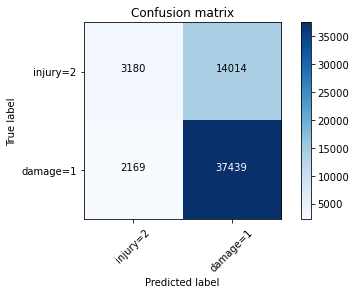

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[2,1])
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['injury=2','damage=1'],normalize= False,  title='Confusion matrix')


Classification report is calculated to check the precision, recall, and f1-score of the model

In [31]:
print (classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

           1       0.73      0.95      0.82     39608
           2       0.59      0.18      0.28     17194

    accuracy                           0.72     56802
   macro avg       0.66      0.57      0.55     56802
weighted avg       0.69      0.72      0.66     56802



## 5. Map Plotting
Usage example of this model is to predict the severity of an accident, and its probability, that could occurs in a particular road type. This prediction value could be sent to the driver in real-time, or it could be a part of a digital city map. This map plotting will try to use 100 y_test data as an example to plot the accident severity probability prediction in a folium map.

The first step is selecting 100 data from predicted values yhat_LR, and concatenate it with the predicted value probability yhat_LR_proba.

In [32]:
yhat_prob_df = pd.DataFrame(yhat_LR_proba)
yhat_prob_df = yhat_prob_df.head(100)
yhat_prob_df.rename(columns={0:'PROP_DAMAGE', 1:'INJURY'}, inplace=True)
print(yhat_prob_df.shape)
yhat_prob_df.head()

(100, 2)


,PROP_DAMAGE,INJURY
0,0.241117,0.758883
1,0.790998,0.209002
2,0.726525,0.273475
3,0.831221,0.168779
4,0.903107,0.096893


In [33]:
y_test_df = pd.DataFrame(y_test_loc)
y_map = clean_df.iloc[y_test_df.index].copy().head(100)
print(y_map.shape)
y_map.head()

(100, 12)


,LATITUDE,LONGITUDE,ADDRTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
114279,47.617528,-122.343624,Intersection,6,2,0.0,1.0,Clear,Dry,Dark - Street Lights On,0.0,2
13346,47.730122,-122.293045,Block,3,3,0.0,0.0,Overcast,Dry,Daylight,1.0,1
133572,47.664981,-122.324519,Block,2,2,1.0,0.0,Clear,Dry,Daylight,0.0,1
51913,47.724075,-122.328906,Block,2,2,0.0,0.0,Overcast,Dry,Dawn,0.0,1
135451,47.570674,-122.288272,Block,2,2,0.0,0.0,Unknown,Unknown,Unknown,0.0,1


In [34]:
y_map['PROP_DAMAGE'] = yhat_prob_df['PROP_DAMAGE'].values
y_map['INJURY'] = yhat_prob_df['INJURY'].values
print(y_map.shape)
y_map.head()

(100, 14)


,LATITUDE,LONGITUDE,ADDRTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE,PROP_DAMAGE,INJURY
114279,47.617528,-122.343624,Intersection,6,2,0.0,1.0,Clear,Dry,Dark - Street Lights On,0.0,2,0.241117,0.758883
13346,47.730122,-122.293045,Block,3,3,0.0,0.0,Overcast,Dry,Daylight,1.0,1,0.790998,0.209002
133572,47.664981,-122.324519,Block,2,2,1.0,0.0,Clear,Dry,Daylight,0.0,1,0.726525,0.273475
51913,47.724075,-122.328906,Block,2,2,0.0,0.0,Overcast,Dry,Dawn,0.0,1,0.831221,0.168779
135451,47.570674,-122.288272,Block,2,2,0.0,0.0,Unknown,Unknown,Unknown,0.0,1,0.903107,0.096893


Create labels for plotting in each coordinate.



In [35]:
road_type = list(y_map.ADDRTYPE)
weather = list(y_map.WEATHER)
road_cond = list(y_map.ROADCOND)
light = list(y_map.LIGHTCOND)
damage = list(y_map.PROP_DAMAGE)
injury = list(y_map.INJURY)
labels = []

for i, lbl in enumerate(road_type):
    temp_lbl = "Road Type: " + str(lbl) + "; " +\
                "Weather: " + str(weather[i]) + "; " +\
                "Road Cond.: " + str(road_cond[i]) + "; " +\
                "Light Cond.: " + str(light[i]) + "; " +\
                "Prop. Damage Prob.: " + str(round(damage[i]*100, 2)) + "%; " +\
                "Injury Prob.: " + str(round(injury[i]*100,2)) + "%; "
    labels.append(temp_lbl)

Plot the data in Seattle City map.



In [40]:
import folium
seattle_map = folium.Map(location=[47.608013, -122.335167], zoom_start=11)
# loop through the 100 accidents and add each to the map
for lat, lng, label in zip(y_map.LATITUDE, y_map.LONGITUDE, labels):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='red',
        fill=True,
        popup=label,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(seattle_map)

# show map
seattle_map